<a href="https://colab.research.google.com/github/Edina8/AEV/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install flask dash plotly pandas

INFO: pip is looking at multiple versions of dash to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dash to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.6 MB/s eta 0:00:00


In [2]:
pip install dash-bootstrap-components

  Using cached dash-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
  Attempting uninstall: dash
    Found existing installation: dash 2.9.3
    Uninstalling dash-2.9.3:
      Successfully uninstalled dash-2.9.3


In [3]:
from flask import Flask, render_template
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Flask app
app = Flask("Csokoládé_eladások")


In [10]:
# Dash app integrálása Flask-be
dash_app = dash.Dash("Csokoládé eladások", server=app, url_base_pathname='/dashboard/')

In [25]:
# Adatok beimportálása
data = pd.read_csv('Chocolate Sales.csv')

In [ ]:
# Az adatok megtekintése
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [13]:
# Hiányzó értékek keresése
print(data.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


In [14]:
# Dátum oszlop konvertálása
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

<ipython-input-14-ec0776c860bd>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [15]:
# Ellenőrzés, hogy sikerült-e
print(data['Date'].head())

0   2022-01-04
1   2022-08-01
2   2022-07-07
3   2022-04-27
4   2022-02-24
Name: Date, dtype: datetime64[ns]


In [16]:
print(data['Country'].value_counts())

Country
Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: count, dtype: int64


In [17]:
print(data['Product'].value_counts())

Product
Eclairs                 60
50% Dark Bites          60
Smooth Sliky Salty      59
White Choc              58
Drinking Coco           56
Spicy Special Slims     54
Organic Choco Syrup     52
85% Dark Bars           50
Fruit & Nut Bars        50
After Nines             50
Peanut Butter Cubes     49
99% Dark & Pure         49
Milk Bars               49
Raspberry Choco         48
Almond Choco            48
Orange Choco            47
Mint Chip Choco         45
Manuka Honey Choco      45
Caramel Stuffed Bars    43
70% Dark Bites          42
Baker's Choco Chips     41
Choco Coated Almonds    39
Name: count, dtype: int64


1.Ábra

In [26]:
# Összegzés országonként
grouped = data.groupby('Country', as_index=False).agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
})

In [21]:
# Térképes vizualizáció
fig = px.scatter_geo(
    grouped,
    locations='Country',
    locationmode='country names',
    size='Boxes Shipped',
    size_max=30,
    color='Amount',
    hover_name='Country',  # csak az ország neve legyen kiemelve
    hover_data={'Country': False, 'Amount': False, 'Boxes Shipped': True},  # mit jelenítsen meg
    projection='natural earth',
    title='Csokoládé eladások országonként'
)

fig.update_layout(geo=dict(showland=True, landcolor='lightgrey'))

fig.show()

2. Ábra

<ipython-input-27-6e6d401932cd>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-27-6e6d401932cd>:13: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



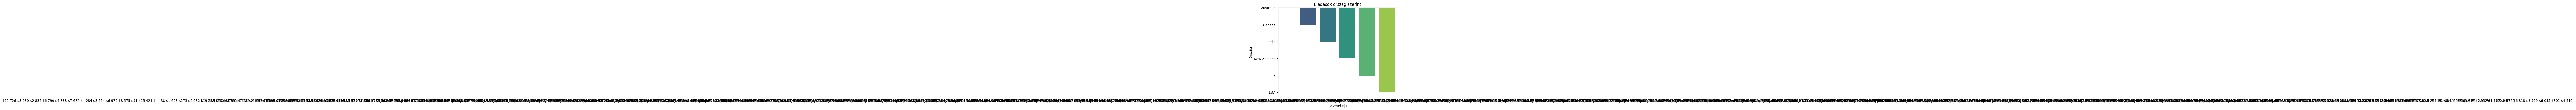

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Eladások ország szerint
country_sales = data.groupby('Country')['Amount'].sum().reset_index()

plt.figure()
sns.barplot(data=country_sales, x='Amount', y='Country', palette='viridis')
plt.title('Eladások ország szerint')
plt.xlabel('Bevétel ($)')
plt.ylabel('Ország')
plt.tight_layout()
plt.show()


3. Ábra

<ipython-input-28-14f4d4ff90ef>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-28-14f4d4ff90ef>:21: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



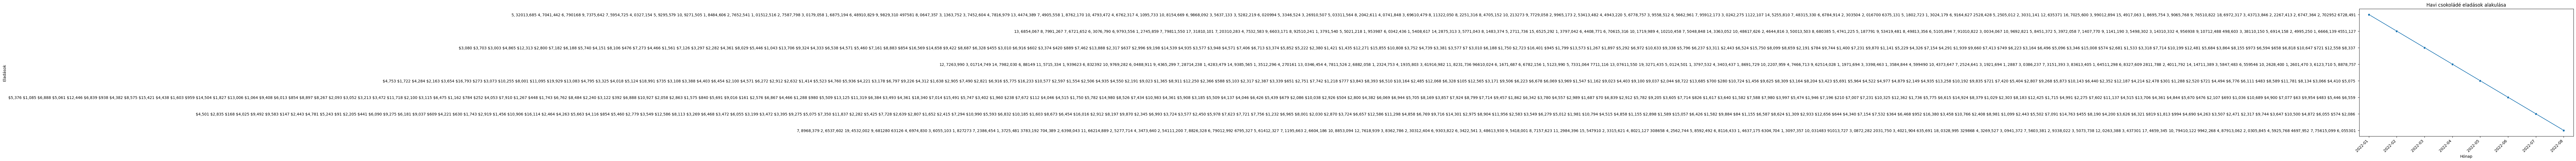

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extract month from 'Date' column
data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M')

# 2. Group by month and sum sales
monthly_sales = data.groupby('Month')['Amount'].sum().reset_index()

# 3. Convert 'Month' to string
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# 4. Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', marker='o')
plt.title('Havi csokoládé eladások alakulása')
plt.xlabel('Hónap')
plt.ylabel('Eladások')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#a teljes értékesítési volumen és tendencia megértése

4. Ábra

In [29]:
import plotly.express as px
import pandas as pd


# 1. Extract month from 'Date' column if needed
data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M').astype(str)

# 2. Group by month and country, and sum sales
monthly_country_sales = data.groupby(['Month', 'Country'])['Amount'].sum().reset_index()

# 3. Create the 3D scatter plot
fig = px.scatter_3d(monthly_country_sales,
                    x='Month',
                    y='Country',
                    z='Amount',
                    color='Amount',  # Color points based on sales amount
                    title='Havi csokoládé eladások (Ország, Hónap, Eladások)')

fig.update_layout(scene=dict(xaxis_title='Hónap',
                             yaxis_title='Ország',
                             zaxis_title='Eladások'))

fig.show()

<ipython-input-29-1a5382a7e644>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



5.Ábra

In [30]:
# Csokoládé eladások típusonkénti eloszlása
type_sales = px.histogram(data_frame=data,
                           x="Product",
                           y="Boxes Shipped",
                           title="Csokoládé eladások típusonkénti eloszlása")
type_sales.update_xaxes(title_text="Típus")
type_sales.update_yaxes(title_text="Eladások")

6. Ábra

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Extract month from 'Date' column
data['Month_Num'] = pd.to_datetime(data['Date']).dt.month

# 2. Group by month and calculate average sales
monthly_avg = data.groupby('Month_Num')['Amount'].mean().reset_index()

# 3. Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month_Num', y='Amount', marker='o')
plt.title('Átlagos havi eladás')
plt.xlabel('Hónap')
plt.ylabel('Átlagos bevétel ($)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()
#a szezonális mintákat és az átlagos értékesítési viselkedést szeretné azonosítani

<ipython-input-32-872b40e4b553>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



TypeError: agg function failed [how->mean,dtype->object]

7. Ábra

In [33]:
# A 10 legjobban eladott csokoládé márka
top_brands = data.groupby('Product')['Boxes Shipped'].sum().nlargest(10)
top_brands_chart = px.bar(top_brands,
                          x=top_brands.index,
                          y=top_brands.values,
                          title="Top 10 legjobban eladott csokoládé márka")
top_brands_chart.update_xaxes(title_text="Márka")
top_brands_chart.update_yaxes(title_text="Eladások")

8.Ábra

In [34]:
import plotly.express as px
import pandas as pd

# 1. Group by country and product, then get the top product for each country
top_products_country = data.groupby(['Country', 'Product'])['Amount'].sum().reset_index()
idx = top_products_country.groupby('Country')['Amount'].idxmax()
top_product_by_country = top_products_country.loc[idx]

# 2. Create the choropleth map
fig = px.choropleth_mapbox(top_product_by_country,
                           geojson="https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",
                           locations='Country',
                           featureidkey="properties.name",
                           color='Amount',
                           hover_name='Product',  # Show product name on hover
                           color_continuous_scale="Viridis",
                           range_color=(0, top_product_by_country['Amount'].max()),
                           mapbox_style="carto-positron",
                           zoom=1,
                           center={"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'Amount': 'Bevétel ($)'},
                           title='Legjobban fogyó csokoládé termék országonként')

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

9.Ábra

In [36]:
import plotly.express as px
import pandas as pd

# Create interactive scatter plot with filters
fig = px.scatter(data_frame=data,
                 x='Amount',
                 y='Boxes Shipped',
                 color='Country',
                 size='Boxes Shipped',
                 hover_name='Product',
                 title="Csokoládé Eladások Interaktív Ábrája",
                 custom_data=['Product'])

# Add dropdown filters for 'Country' and 'Product'
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            active=0,
            x=0.1,
            y=1.1,
            buttons=list([
                dict(label="Összes Ország",
                     method="update",
                     args=[{"visible": [True for _ in fig.data]},
                           {"title": "Összes Ország"}]),
                *[dict(label=country,
                          method="update",
                          args=[{"visible": [(d.name == country) for d in fig.data]},
                                {"title": f"Ország: {country}"}]
                         ) for country in data['Country'].unique()]
            ]),
        ),
    ]
)

fig.show()